In [3]:
import evaluation.evaluate
reload(evaluation.evaluate)
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import pandas as pd
import numpy as np

mpl.rcParams['figure.figsize'] = [14,8]

In [4]:
folderpath = 'C:/Users/rachel/Desktop/emg/results_final/results_fft'

In [5]:
e = evaluation.evaluate.Evaluation()

In [6]:
#e.add_folder(folderpath, e.add_hdf5)
#e.results.to_pickle('only_fft')
e.results=pd.read_pickle('only_fft')

In [7]:
e.results.shape

(6380, 21)

In [13]:
e.make_same('file', ['angle', 'angle_small'])
e.make_same('file', ['stroke$_1$', 'stroke_left', 'stroke_P_4_self_left'])
e.make_same('file', ['stroke$_2$', 'stroke_right', 'stroke_P_4_self_right'])
e.make_same('file', ['pEMG', 'pemg', 'dataset-20140123-0R-a'])
e.make_same('file', ['action','physical'])
e.make_same('file', ['0G$_2$', '0g_tiny', '2011-05-10-vogel'])
e.make_same('file', ['0G$_1$', '0g', 'Hannes1'])
e.make_same('file', ['knee_old', 'bdsemg'])
e.make_same('file', ['knee', 'knee_1'])
e.make_same('file', ['knee$_3$', 'knee_3'])
e.make_same('file', ['knee$_5$', 'knee_5'])
e.make_same('model', ['pPCA', 'ppca'])
e.make_same('model', ['GMM', 'gmm'])
e.make_same('model', ['ICA', 'ica'])
e.make_same('model', ['FA', 'fa'])
e.make_same('model', ['MFA', 'mfa'])
e.make_same('model', ['VAE', 'VA', 'vae'])
e.make_same('model', ['MST', 'mst'])
e.make_same('function', ['lc','logcosh'])
e.make_same('function', ['lo','laplace'])
e.make_same('cov', ['diagonal', 'diag'])
e.make_same('fft', ['', -1, 0])
e.make_same('fft', ['fft', 1])

In [64]:
#rcParams.clear()
mpl.rcParams['xtick.direction']='out'
mpl.rcParams['ytick.direction']='out'
mpl.rcParams['xtick.major.pad']=2
mpl.rcParams['xtick.minor.pad']=2
mpl.rcParams['ytick.major.pad']=1
mpl.rcParams['ytick.minor.pad']=1
mpl.rcParams['text.usetex'] = False
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['figure.figsize'] = [12,6]
#mpl.rcParams['figure.figsize'] = [6.8, 9/2.0]
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['font.size'] = 8
mpl.rcParams['figure.facecolor'] = 'w'
#mpl.rcParams['figure.edgecolor'] = 'w'
mpl.rcParams['legend.labelspacing'] = .3
#mpl.rcParams['legend.borderpad']=0.5
mpl.rcParams['legend.borderaxespad']=0.1
mpl.rcParams['legend.columnspacing']=1.2
mpl.rcParams['figure.subplot.wspace'] = .4
mpl.rcParams['figure.subplot.hspace'] = .2
#mpl.rcParams['figure.autolayout']=False
mpl.rcParams['savefig.bbox']='tight'
mpl.rcParams['figure.subplot.left']=0.0
mpl.rcParams['figure.subplot.right']=1
#mpl.rcParams['legend.isaxes']=False
#matplotlib.ticker.Sc
figfolder = r'C:/Users/rachel/git/2014-prob-emg/paper/figs/'

In [12]:
e.results.columns.values

array([u'classification', u'cov', u'fft', u'file', u'function',
       u'max_iter', u'model', u'n_features', u'n_latents', u'n_mixcomps',
       u'n_splits', u'offset', u'rectified', u'scaled', 'test mean',
       'test std', u'test_fraction', 'train mean', 'train std',
       u'whitened', u'window_size'], dtype=object)

In [14]:
e.set_order('window_size', 'ascend')
e.set_order('n_mixcomps', 'ascend')
e.set_order('n_latents','ascend')
e.set_order('model', ['pPCA','FA','ICA','VAE','GMM','MST','MFA'])
#e.set_order('flags', ['raw', 's', 'w', 'sw', 'r', 'sr', 'rw', 'srw'])
e.set_order('function', ['lc', 'lo'])
        

In [21]:
e.unfilter()

TypeError: cannot convert the series to <type 'float'>

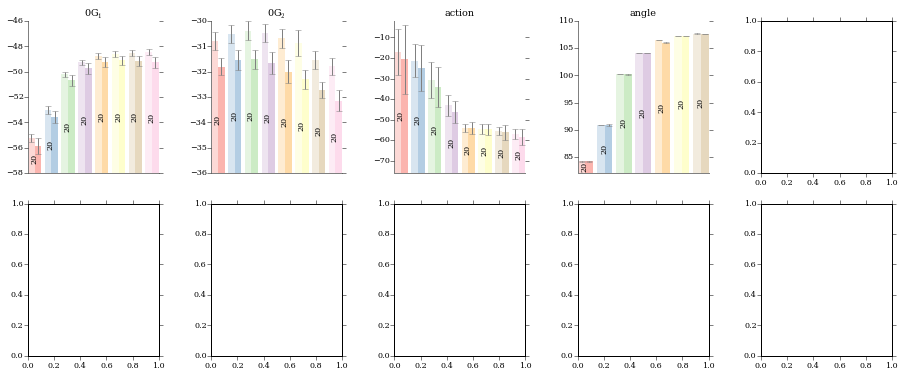

In [65]:
e.filter('model', 'GMM')
best = e.best_results_for(['file', 'window_size'], fun='max')
counts = e.best_results_for(['file', 'window_size'], fun='count')
e.group_subplots(best, counts, error=True, no_rows=2, colormap='Pastel1', base=2, eps=.5)

In [30]:
best.reset_index().iloc[35]


file               knee
window_size          25
test mean      14.68974
train mean     14.67297
test std       0.471329
train std      0.298535
Name: 35, dtype: object

In [32]:
bestr = best.reset_index()

In [43]:
output = bestr[(bestr['file'] == 'knee') & (bestr['window_size']== 3)]['test mean']

In [46]:
len(output)

0

In [47]:
np.float(output if len(output)>0 else np.nan)


nan

In [50]:
k=e.results.to_pickle('only_fft')

In [51]:
p= evaluation.evaluate.Evaluation()

In [52]:
p.results=pd.read_pickle('only_fft')

In [54]:
p.results.shape

(6380, 21)